# Notebook to compare the ORA and Glorys reanalysis data

In [15]:
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt

In [21]:
# Import reanalysis data
ora_20c = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ORA20C/forcing input/ora20c.nc')
glorys12 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/GLORYS12V1/processed/glorys.nc')

# Sort coordinates in increasing order
ora_20c = ora_20c.sortby(['depth', 'latitude', 'longitude'])
glorys12 = glorys12.sortby(['depth', 'latitude', 'longitude'])

# Obtain annual averages
ora_20c = ora_20c.groupby('time.year').mean()
glorys12 = glorys12.groupby('time.year').mean()

In [10]:
# Import tide gauge locations

def station_coords(): 
    """
    Function to obtain the coordinates of the tide gauge stations as a dataframe
    
    """
    path_slh = '/Users/iriskeizer/Documents/ROMS/data/'
    stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Brest', 'Sheerness', 'Cuxhaven']
    
    # Necessary declarations to obtain tide gauge station coordinates
    path_locations = path_slh + 'rlr_annual/filelist.txt'
    loc_num = [20, 22, 23, 24, 25, 32, 1, 3, 7]
    col_names = ['id', 'lat', 'lon', 'station', 'coastline_code', 'station_code', 'quality']
    
    # Create dataframe
    df = pd.read_csv(path_locations, sep=';', header=None, names=col_names)
    df = df.set_index('id')
    df = df.loc[loc_num, :]
    df['station'] = stations
    df = df.set_index('station')
    df = df.drop(['coastline_code', 'station_code', 'quality'], axis=1)
    
    return df

tg_coords = station_coords()

In [41]:
glorys12

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 409, year: 27, longitude: 457)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 32.0 32.08 32.17 32.25 ... 65.83 65.92 66.0
  * longitude  (longitude) float32 -24.0 -23.92 -23.83 ... 13.83 13.92 14.0
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2016 2017 2018 2019
Data variables:
    so         (year, depth, latitude, longitude) float32 36.83 36.83 ... nan
    thetao     (year, depth, latitude, longitude) float32 20.85 20.84 ... nan
    uo         (year, depth, latitude, longitude) float32 -0.05839 ... nan
    vo         (year, depth, latitude, longitude) float32 -0.02665 ... nan
    zos        (year, latitude, longitude) float32 -0.1267 -0.1279 ... nan nan

## Compare reanalysis data for different tide gauge stations

In [64]:
tg_coords

,lat,lon
station,,
Vlissingen,51.442222,3.596111
Hoek v. Holland,51.977500,4.120000
Den Helder,52.964444,4.745000
Delfzijl,53.326389,6.933056
Harlingen,53.175556,5.409444
IJmuiden,52.462222,4.554722
Brest,48.382850,-4.494838
Sheerness,51.445639,0.743444
Cuxhaven,53.866667,8.716667


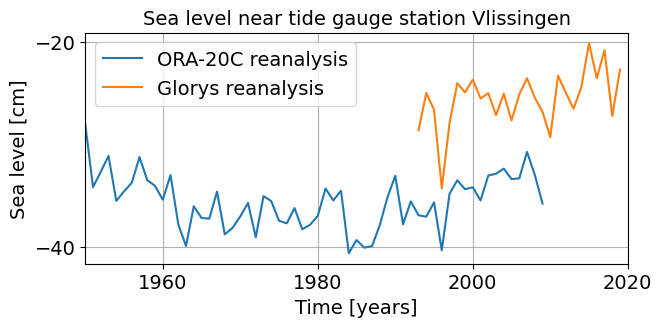

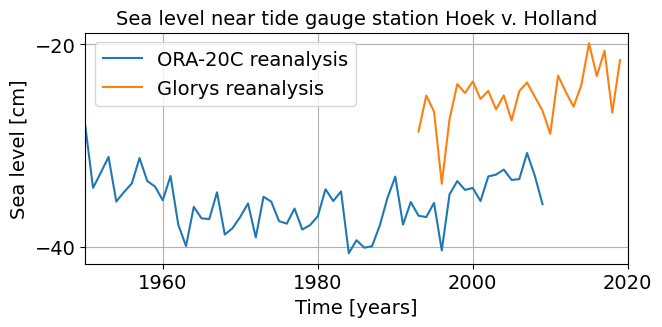

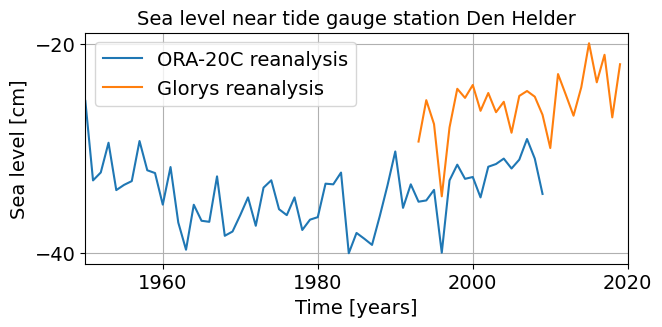

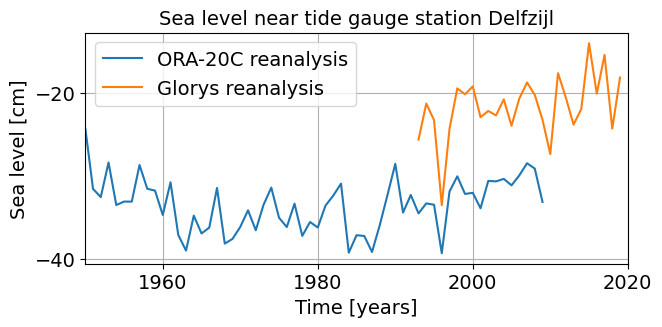

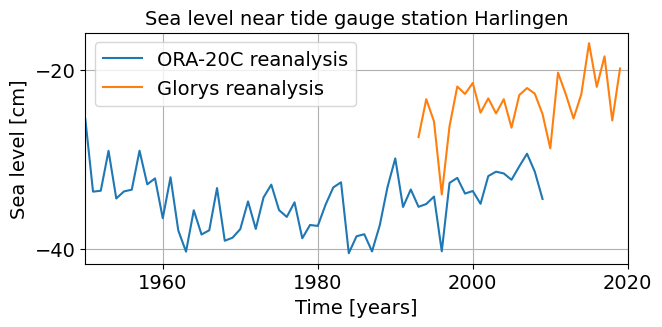

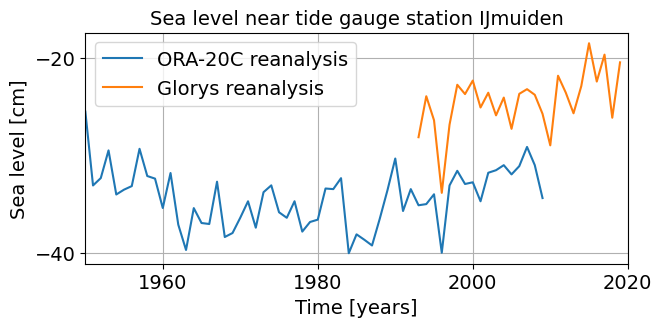

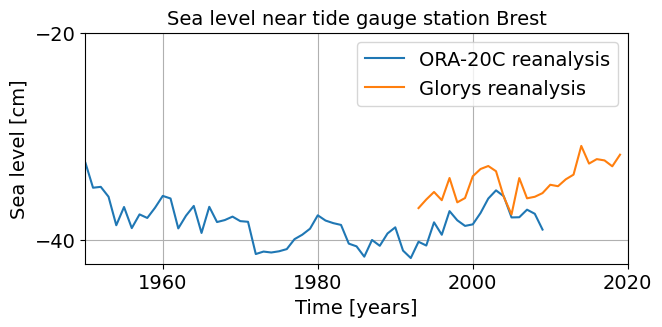

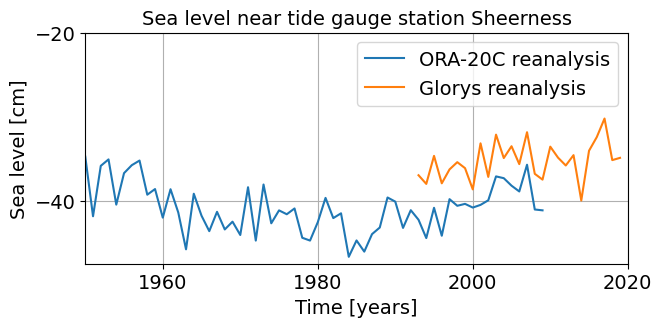

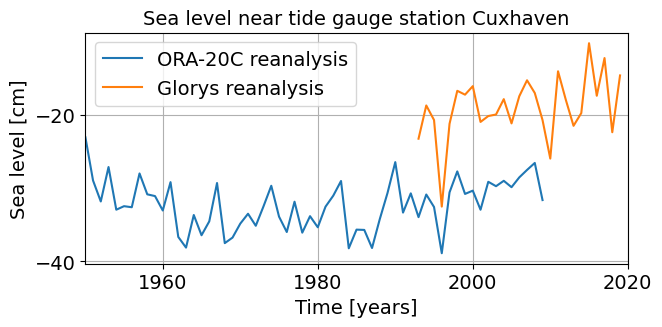

In [119]:
station = 'IJmuiden'  # When station is changed for some datasets the values should be changed to move more towards the sea to not get NaN values

stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden', 'Brest', 'Sheerness', 'Cuxhaven']

for station in stations:

    plt.figure(figsize = (7,3))


    # Select data near station
    if station == 'Hoek v. Holland':
        
        ora_station = ora_20c.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station]-0.2, method = 'Nearest')
        glorys_station = glorys12.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')
        
    elif station == 'Delfzijl': 
        
        ora_station = ora_20c.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')
        glorys_station = glorys12.sel(latitude = tg_coords['lat'][station]+0.05, longitude = tg_coords['lon'][station], method = 'Nearest')
           
    elif station == 'Brest': 
        
        ora_station = ora_20c.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')
        glorys_station = glorys12.sel(latitude = tg_coords['lat'][station]-0.03, longitude = tg_coords['lon'][station], method = 'Nearest')
           
    elif station == 'Sheerness': 
        
        ora_station = ora_20c.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')
        glorys_station = glorys12.sel(latitude = tg_coords['lat'][station]+0.02, longitude = tg_coords['lon'][station], method = 'Nearest')
    
    elif station == 'Cuxhaven': 
        
        ora_station = ora_20c.sel(latitude = tg_coords['lat'][station]+0.5, longitude = tg_coords['lon'][station], method = 'Nearest')
        glorys_station = glorys12.sel(latitude = tg_coords['lat'][station]+0.02, longitude = tg_coords['lon'][station], method = 'Nearest')
        
    else:
        
        ora_station = ora_20c.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')
        glorys_station = glorys12.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')
    
    
    
    # Plot data
    plt.plot(ora_station.year, ora_station.zos*100)
    plt.plot(glorys_station.year, glorys_station.zos*100)


    # Format figure
    fsize = 14

    plt.xlabel('Time [years]', fontsize = fsize)
    plt.ylabel('Sea level [cm]', fontsize = fsize)
    plt.title(f'Sea level near tide gauge station {station}', fontsize = fsize)

    plt.xlim([1950, 2020])
    plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
    plt.yticks([-40, -20], fontsize = fsize)

    plt.grid()


    # Add legend
    plt.legend(labels = ['ORA-20C reanalysis', 'Glorys reanalysis'], fontsize = fsize)

    if station == 'Hoek v. Holland':
        plt.savefig(f'figures/ora_glorys_tidegauges_HoekvHolland')
    else:
        plt.savefig(f'figures/ora_glorys_tidegauges_{station}')


## Compare reanalysis data for regional mean

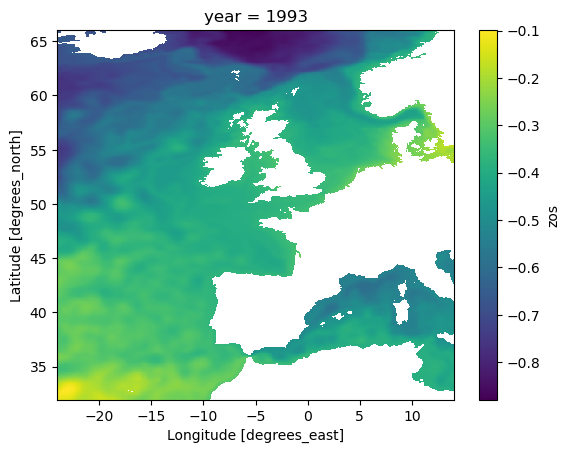

In [115]:
glorys12.zos.isel(year=0).plot()
plt.savefig('figures/glorys_zos_surface_1993')

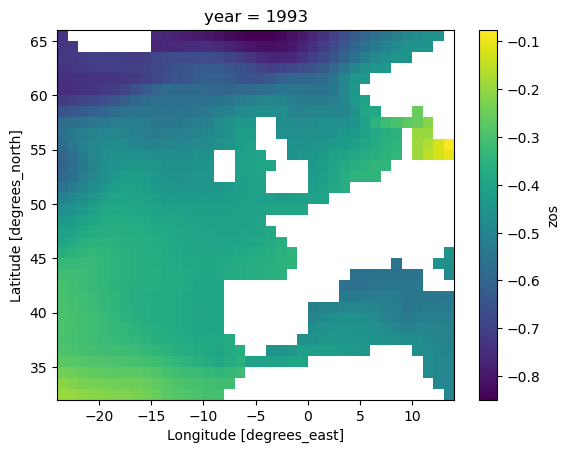

In [116]:
ora_20c.zos.isel(year=93).plot()
plt.savefig('figures/ora_zos_surface_1993')

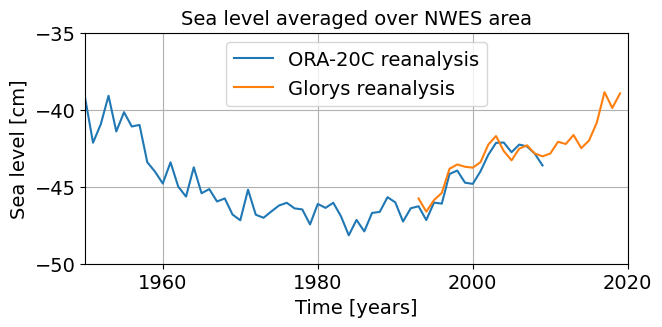

In [117]:
plt.figure(figsize = (7,3))


ora_area = ora_20c.mean(['latitude', 'longitude'])
glorys_area = glorys12.mean(['latitude', 'longitude'])

# Plot data
plt.plot(ora_area.year, ora_area.isel(depth=0).zos*100)
plt.plot(glorys_area.year, glorys_area.isel(depth=0).zos*100)


# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Sea level averaged over NWES area', fontsize = fsize)

plt.xlim([1950, 2020])
plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
plt.yticks([-50, -45, -40, -35], fontsize = fsize)

plt.grid()


# Add legend
plt.legend(labels = ['ORA-20C reanalysis', 'Glorys reanalysis'], fontsize = fsize)

plt.savefig('figures/glorys_ora_region_average')

## Compare MDT

Select data from 1993 to 2009 and obtain time average

In [97]:
ora_mdt = ora_20c.zos.where((ora_20c.year > 1992), drop = True).mean('year')
glorys_mdt = glorys12.zos.where((glorys12.year < 2010), drop = True).mean('year')



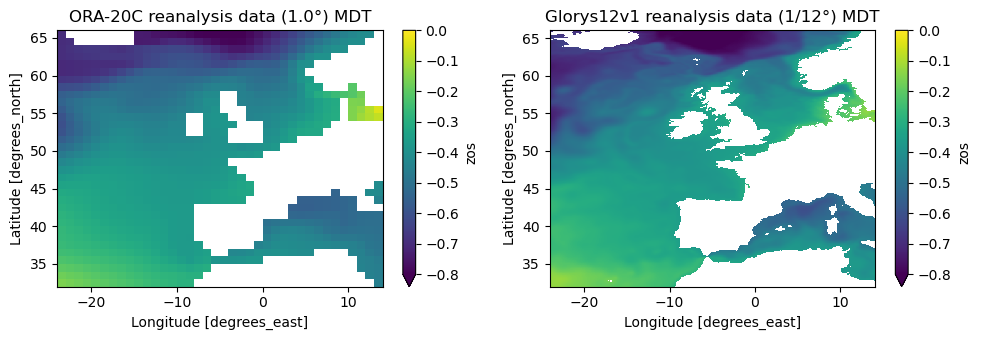

In [110]:
# Create figures
fig, axes = plt.subplots(ncols = 2, figsize = (10,3.5))


ora_mdt.plot(ax = axes[0], vmin = -0.8, vmax = 0)
glorys_mdt.plot(ax = axes[1], vmin = -0.8, vmax = 0)

axes[0].set_title(f'ORA-20C reanalysis data (1.0°) MDT')
axes[1].set_title(f'Glorys12v1 reanalysis data (1/12°) MDT')
    
plt.tight_layout()
